11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


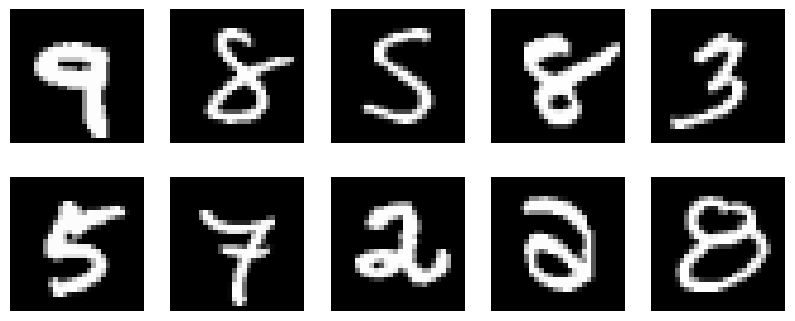

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Загрузка набора данных MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Масштабирование пикселей к диапазону [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Добавление измерения канала (1) к изображениям
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# Визуализация нескольких исходных изображений из обучающей выборки
idx = np.random.randint(0, x_train.shape[0], size=10)  # случайные индексы
plt.figure(figsize=(10,4))
for i, index in enumerate(idx):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


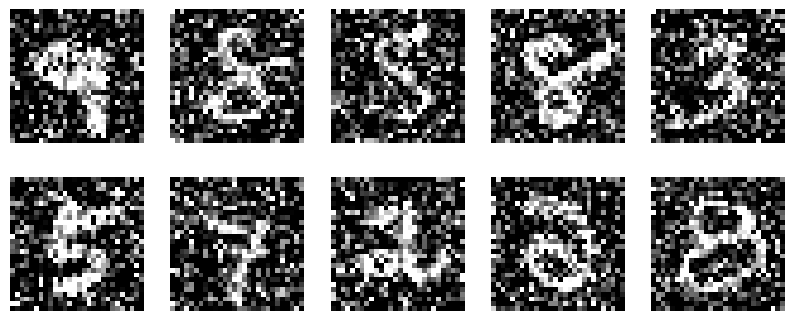

In [2]:
# Добавление гауссовского шума к изображениям
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy  = x_test  + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Обрезка значений, выходящих за границы [0,1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy  = np.clip(x_test_noisy, 0.0, 1.0)

# Визуализация зашумленных изображений (те же примеры, что и выше)
plt.figure(figsize=(10,4))
for i, index in enumerate(idx):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_noisy[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Построение сверточного автокодировщика
model = Sequential()
# Энкодер: сжатие изображения до скрытого представления
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2), padding='same'))        # => размер 14x14x32
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))        # => размер 7x7x32 (скрытое представление)
# Декодер: восстановление исходного размера изображения из скрытого представления
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))                        # => размер 14x14x32
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))                        # => размер 28x28x32
model.add(Conv2D(1, (3,3), activation='sigmoid', padding='same'))  # выходной слой 28x28x1

# Компиляция модели автокодировщика
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Вывод сводки архитектуры модели
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8135 - loss: 0.0943 - val_accuracy: 0.8125 - val_loss: 0.0939
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8135 - loss: 0.0940 - val_accuracy: 0.8125 - val_loss: 0.0939
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8136 - loss: 0.0941 - val_accuracy: 0.8128 - val_loss: 0.0941
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8139 - loss: 0.0939 - val_accuracy: 0.8125 - val_loss: 0.0939
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8136 - loss: 0.0941 - val_accuracy: 0.8127 - val_loss: 0.0940
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8136 - loss: 0.0938 - val_accuracy: 0.8126 - val_loss: 0.0937
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8133 - loss: 0.0940 - val_accuracy: 0.8128 - val_loss: 0.0939
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8136 - loss: 0.0939 - val_accuracy: 0.

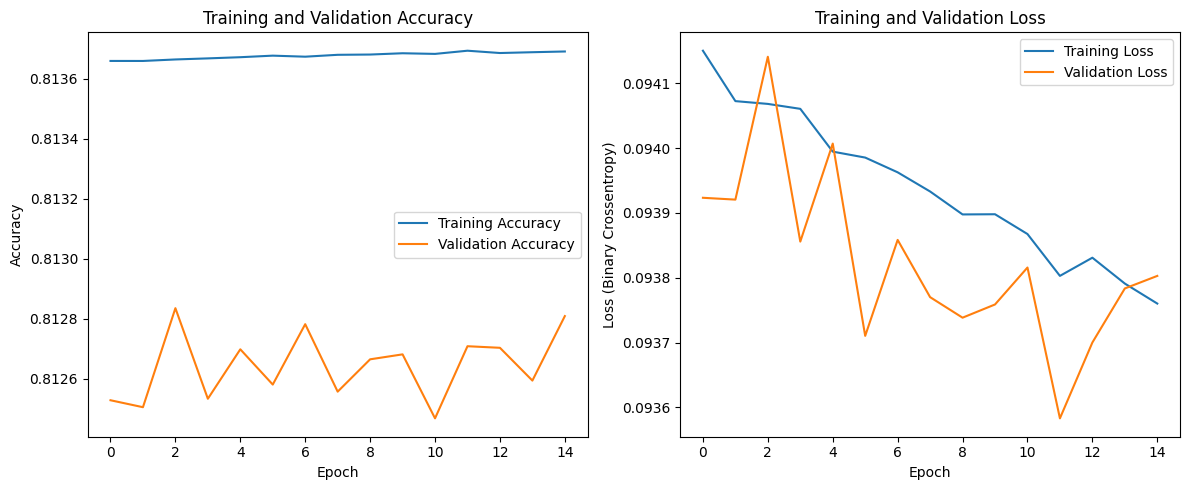

In [12]:
# Обучение автокодировщика на зашумленных данных
history = model.fit(x_train_noisy, x_train,
                    epochs=15,
                    batch_size=128,
                    validation_data=(x_test_noisy, x_test))

# График истории обучения (функция потерь на обучении и валидации)
# Построение графиков accuracy и loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Оценка модели на тестовых данных (MSE на восстановление изображений)
test_loss = model.evaluate(x_test_noisy, x_test, verbose=0)
print("Test loss (Binary Crossentropy):", test_loss)


Test loss (MSE): 0.0964578166604042


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


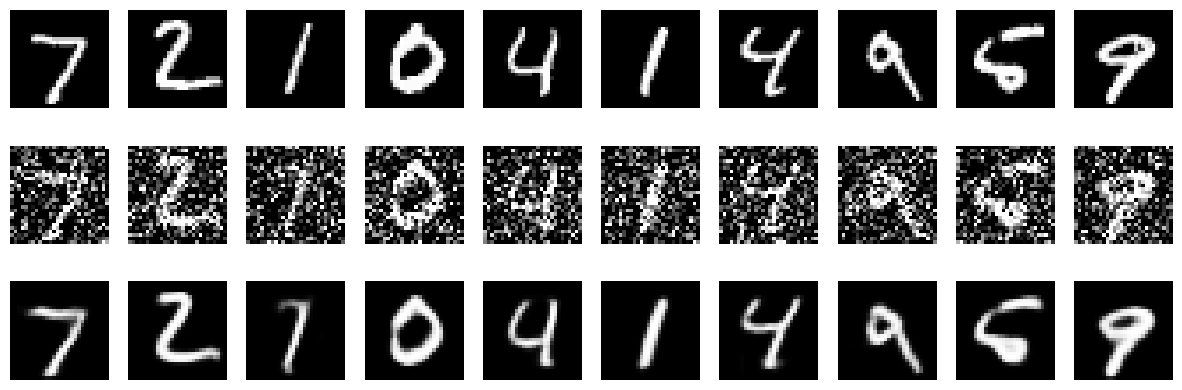

In [13]:
# Реконструирование изображений из зашумленных входов с помощью обученного автокодировщика
decoded_imgs = model.predict(x_test_noisy)

# Визуализация оригинальных, зашумленных и восстановленных изображений
n = 10  # количество примеров для отображения
plt.figure(figsize=(15, 5))
for i in range(n):
    # Исходное изображение (верхний ряд)
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Зашумленное изображение (средний ряд)
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Восстановленное изображение (нижний ряд)
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
